# Psychrochart

A Python 3 library to make psychrometric charts with `matplotlib`

In [1]:
from IPython.core.display import HTML

from psychrochart import PsychroChart

# Load chart with default style:
chart_default = PsychroChart.create()
svg_data = chart_default.make_svg()
display(HTML(svg_data))

# Customize and plot again:
chart_default.config.figure.title = "Zoom IN"
chart_default.config.chart_params.constant_temp_label_step = 1
chart_default.config.limits.range_temp_c = (20, 26)
chart_default.config.limits.range_humidity_g_kg = (5, 12)
HTML(chart_default.make_svg())

In [2]:
# generate PNG image on disk
chart_default.save("nb-charts/default-chart.png")

HTML('<img src="nb-charts/default-chart.png"/>')

### Chart style

The default styling for charts is defined with `pydantic` models, which can be exported as **JSON** files that you can edit or reuse, by passing a path of a JSON file, or a dict with modifications.

```python
# Load chart with preconfigured styles:
chart_ashrae_style = PsychroChart.create('ashrae')
chart_ashrae_style.plot()

# Specify the styles JSON file:
chart_custom = PsychroChart.create('path/to/custom_config.json')
chart_custom.plot()

# Generate new style config from preset:
chart_ashrae_style.config.figure.title = None
chart_ashrae_style.config.limits.range_temp_c = (15, 35)
chart_ashrae_style.config.limits.range_humidity_g_kg = (0, 25)
chart_ashrae_style.config.saturation.color = 'darkorange'
chart_ashrae_style.config.saturation.linewidth = 4
# and store as JSON file
from pathlib import Path
Path("path/to/custom_config.json").write_text(chart_ashrae_style.config.json(indent=2))
```

Included styles are: `default`, `ashrae`, `ashrae_ip`, `interior` and `minimal`.

####  Fine-grain customization

From any _preset_ configuration, or stored JSON, you can change any configuration parameter to plot a totally personalized psychrochart 🦄

```python
ashrae_zoom_in = PsychroChart.create('ashrae')
ashrae_zoom_in.config.limits.range_temp_c = (18, 28)
ashrae_zoom_in.config.limits.range_humidity_g_kg = (5, 12)
HTML(ashrae_zoom_in.make_svg())
```

In [3]:
print("** Customized chart style (from `ashrae`), Zoom in [15, 35]:")
chart_ashrae_style = PsychroChart.create('ashrae')

# zoom in
chart_ashrae_style.config.figure.title = None
chart_ashrae_style.config.limits.range_temp_c = (15, 35)
chart_ashrae_style.config.limits.range_humidity_g_kg = (0, 25)
chart_ashrae_style.config.saturation.color = 'darkorange'
chart_ashrae_style.config.saturation.linewidth = 4

svg_ashrae = chart_ashrae_style.make_svg()
HTML(svg_ashrae)

** Customized chart style (from `ashrae`), Zoom in [15, 35]:


In [4]:
print("** Preconfigured chart style: `ashrae_ip`:")
chart_ashrae_ip = PsychroChart.create('ashrae_ip', use_unit_system_si=False)
svg_ashrae_ip = chart_ashrae_ip.make_svg()
HTML(svg_ashrae_ip)

** Preconfigured chart style: `ashrae_ip`:


In [5]:
# Customize plot from a preset style
custom_chart = PsychroChart.create("minimal")
# Customize it
custom_chart.config.figure.figsize = (12, 8)
custom_chart.config.figure.x_label = None
custom_chart.config.figure.y_label = None
custom_chart.config.saturation.linewidth = 3
custom_chart.config.chart_params.with_constant_dry_temp = False
custom_chart.config.chart_params.with_constant_humidity = False
custom_chart.config.chart_params.with_constant_wet_temp = False
custom_chart.config.chart_params.with_constant_h = False

# plot to generate matplotlib objects, and continue customizing  the chart 🌈 
custom_chart.plot()
# show names of objects in plot
print("** Each object in plot has a readable name to access it for fine-grain customizations:")
print(custom_chart.artists.render_tree())

# apply customizations for single objects in plot
custom_chart.artists.saturation["saturation_100"].set_linewidth(8)
for rh_name in ('constant_relative_humidity_20', 'constant_relative_humidity_80'):
    line = custom_chart.artists.constant_rh[rh_name]
    line.set_linestyle(":")
    line.set_linewidth(3)
    line.set_color("darkblue")

print("\n\n** Customized style from preconfigured `minimal` style, with extra customizations:")
svg_custom = custom_chart.make_svg()
HTML(svg_custom)

** Each object in plot has a readable name to access it for fine-grain customizations:
* saturation:
   - saturation_100
* constant_rh:
   - constant_relative_humidity_20
   - constant_relative_humidity_40
   - constant_relative_humidity_60
   - constant_relative_humidity_80
   - label_legend_constant_relative_humidity
* constant_v:
   - constant_specific_volume_0_86
   - constant_specific_volume_0_9
   - constant_specific_volume_0_94
   - label_legend_constant_specific_volume
* layout:
   - chart_background
   - chart_x_axis
   - chart_y_axis
   - chart_x_axis_bottom_line
   - chart_y_axis_right_line


** Customized style from preconfigured `minimal` style, with extra customizations:


In [6]:
# Pass a dict with the changes wanted:
custom_style = {
    "figure": {
        "figsize": [12, 8],
        "base_fontsize": 12,
        "title": "My chart",
        "x_label": None,
        "y_label": None,
        "partial_axis": False
    },
    "limits": {
        "range_temp_c": [10, 30],
        "range_humidity_g_kg": [0, 25],
        "altitude_m": 900,
        "step_temp": .5
    },
    "saturation": {"color": [0, .3, 1.], "linewidth": 2},
    "constant_rh": {"color": [0.0, 0.498, 1.0, .7], "linewidth": 2.5,
                    "linestyle": ":"},
    "chart_params": {
        "with_constant_rh": True,
        "constant_rh_curves": [25, 50, 75],
        "constant_rh_labels": [25, 50, 75],
        
        "range_vol_m3_kg": [0.9, 1.],
        "constant_v_labels": [0.9, 0.94, 0.98],
        
        "with_constant_h": False,
        "with_constant_wet_temp": False,
        "with_zones": False
    }
}

print("** Customized style from dict:\n{}\n".format(custom_style))
chart_custom_2 = PsychroChart.create(custom_style)
svg_custom_2 = chart_custom_2.make_svg()
HTML(svg_custom_2)

** Customized style from dict:
{'figure': {'figsize': [12, 8], 'base_fontsize': 12, 'title': 'My chart', 'x_label': None, 'y_label': None, 'partial_axis': False}, 'limits': {'range_temp_c': [10, 30], 'range_humidity_g_kg': [0, 25], 'altitude_m': 900, 'step_temp': 0.5}, 'saturation': {'color': [0, 0.3, 1.0], 'linewidth': 2}, 'constant_rh': {'color': [0.0, 0.498, 1.0, 0.7], 'linewidth': 2.5, 'linestyle': ':'}, 'chart_params': {'with_constant_rh': True, 'constant_rh_curves': [25, 50, 75], 'constant_rh_labels': [25, 50, 75], 'range_vol_m3_kg': [0.9, 1.0], 'constant_v_labels': [0.9, 0.94, 0.98], 'with_constant_h': False, 'with_constant_wet_temp': False, 'with_zones': False}}



## Overlay information

Append zones or points in a customized psychrometric chart to quickly make _your chart_

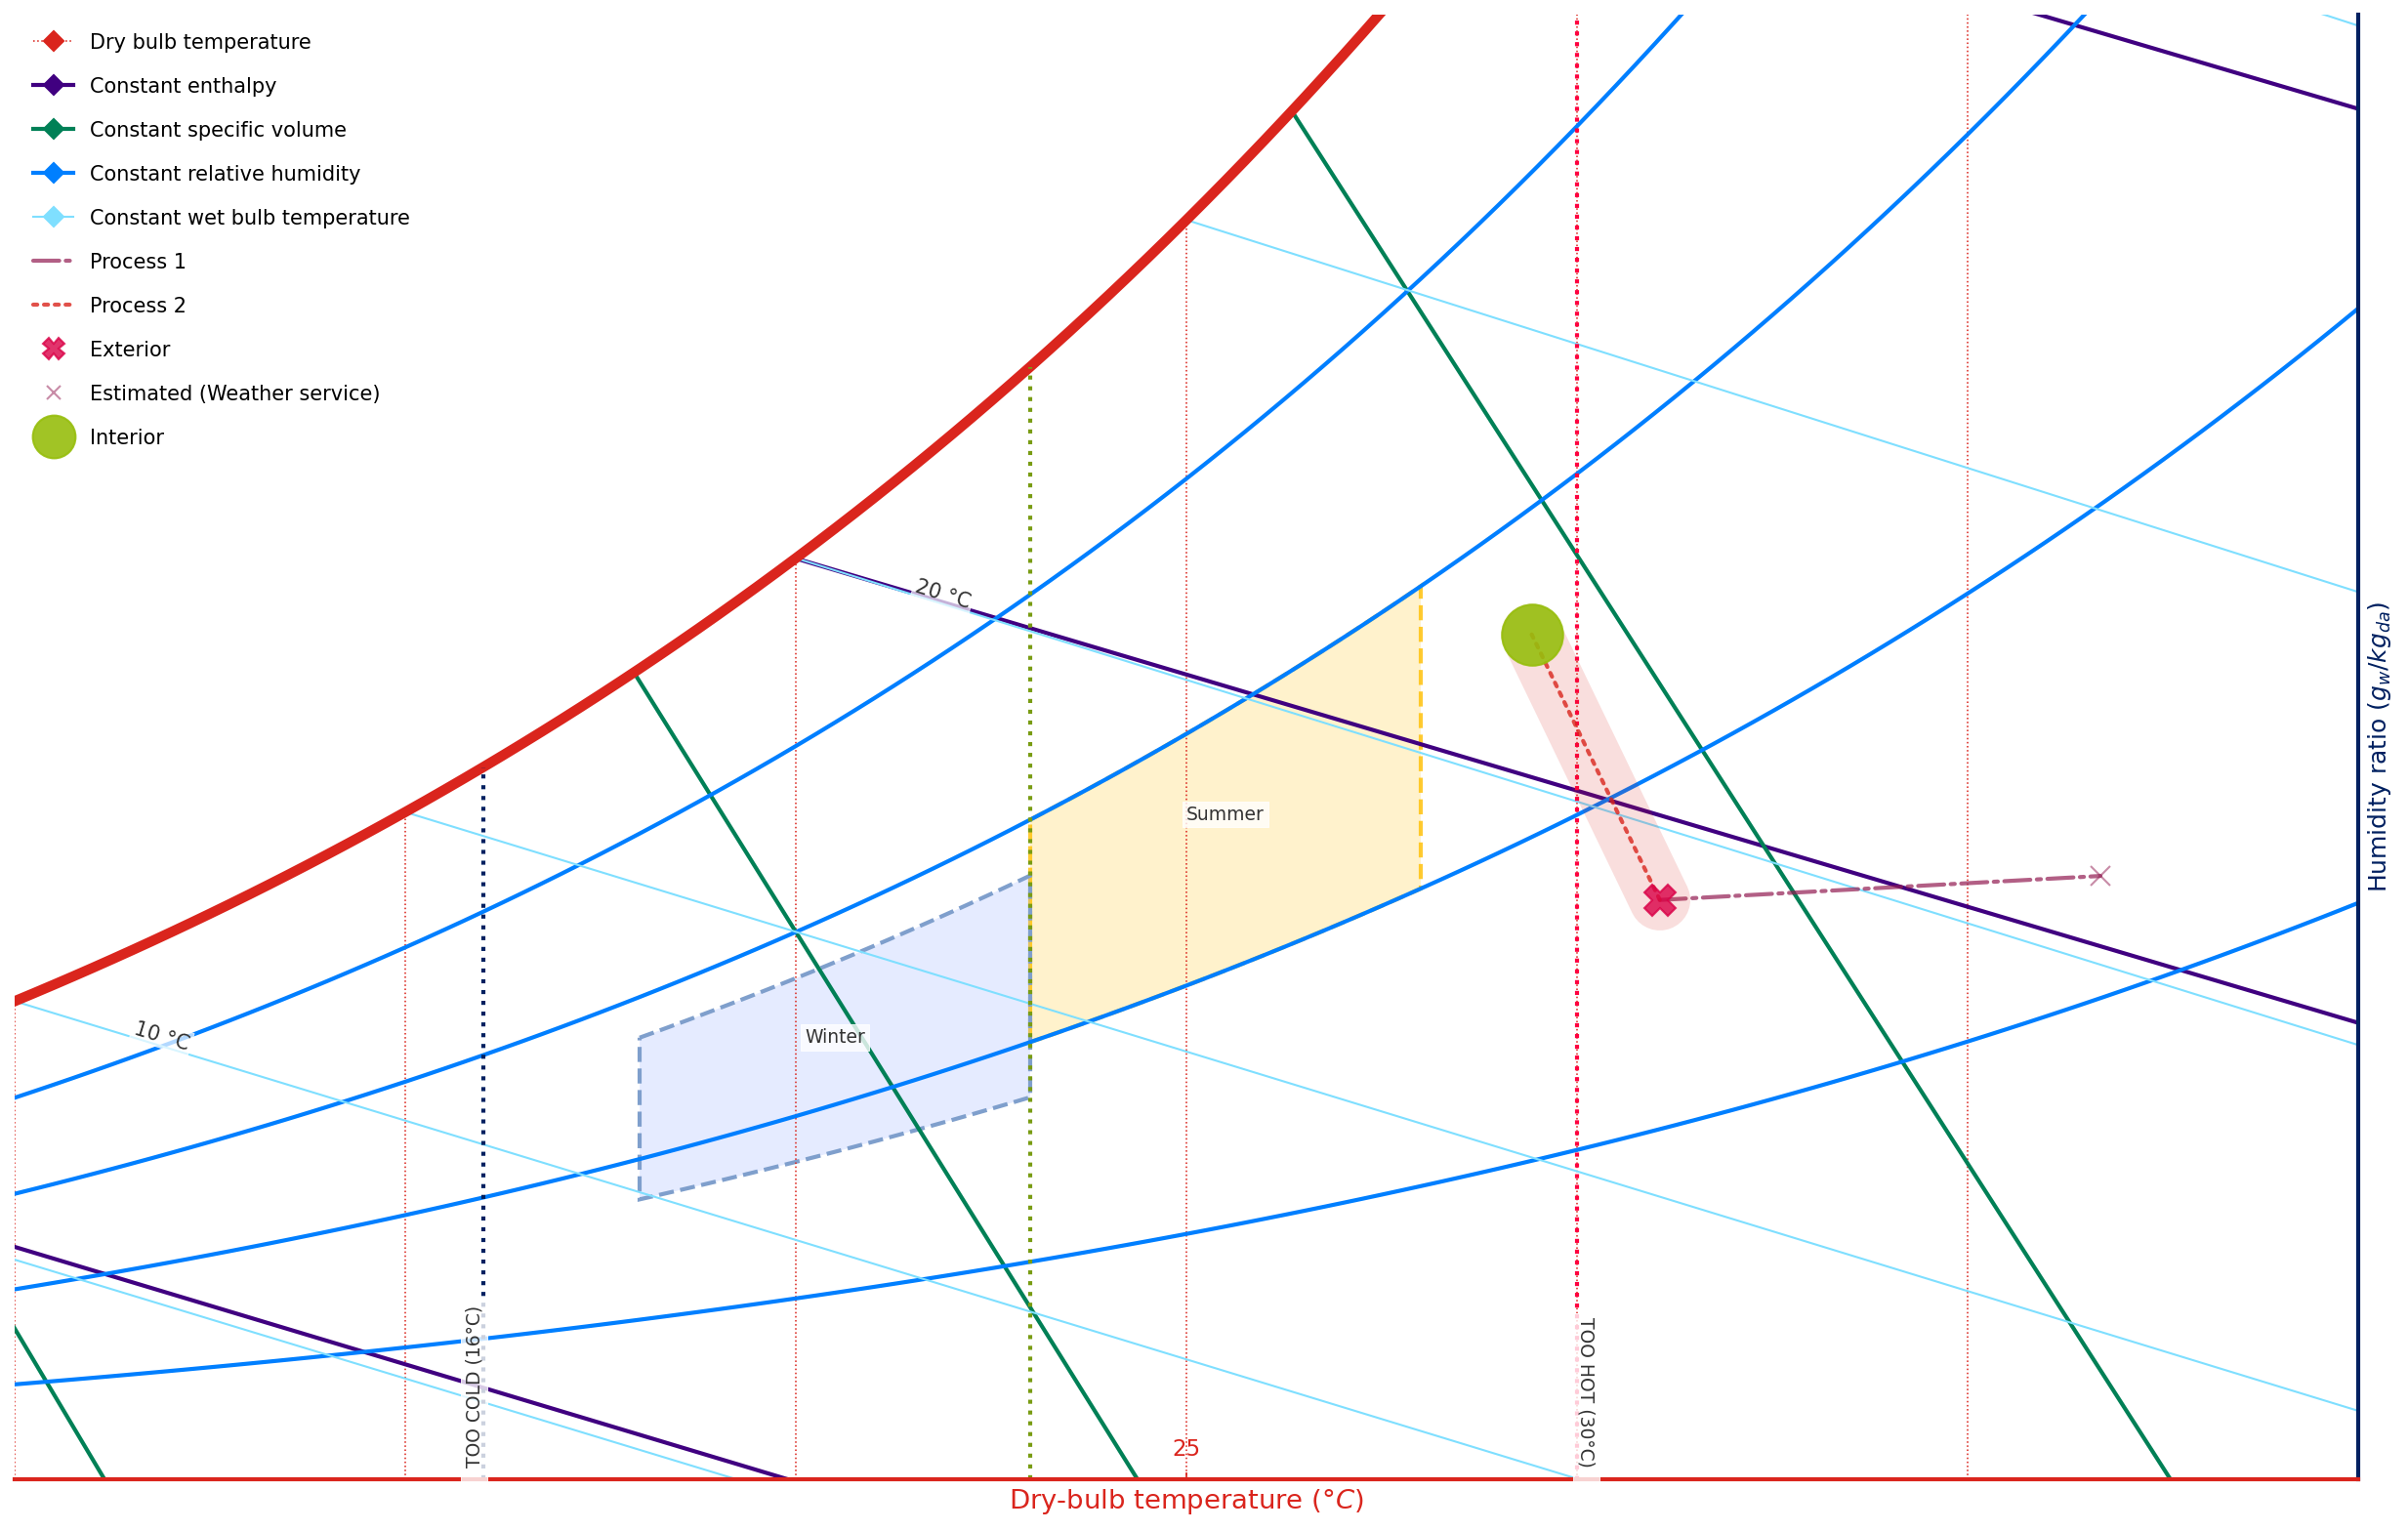

In [7]:
# Get a preconfigured chart
chart = PsychroChart.create("minimal")
#chart.config.figure.figsize = (12, 8)
# Append zones:
zones_conf = {
    "zones":[{
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [1.0, 0.749, 0.0, 0.8],
                      "facecolor": [1.0, 0.749, 0.0, 0.2],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [23, 28],
            "points_y": [40, 60],
            "label": "Summer"
        },
        {
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [0.498, 0.624, 0.8],
                      "facecolor": [0.498, 0.624, 1.0, 0.2],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [18, 23],
            "points_y": [35, 55],
            "label": "Winter"
        }]}
chart.append_zones(zones_conf)

# Plot the chart
ax = chart.plot()

# Add Vertical lines
t_min, t_opt, t_max = 16, 23, 30
chart.plot_vertical_dry_bulb_temp_line(
    t_min, {"color": [0.0, 0.125, 0.376], "lw": 2, "ls": ':'},
    '  TOO COLD ({}°C)'.format(t_min), ha='left', loc=0., fontsize=14)
chart.plot_vertical_dry_bulb_temp_line(
    t_opt, {"color": [0.475, 0.612, 0.075], "lw": 2, "ls": ':'})
chart.plot_vertical_dry_bulb_temp_line(
    t_max, {"color": [1.0, 0.0, 0.247], "lw": 2, "ls": ':'},
    'TOO HOT ({}°C)  '.format(t_max), ha='right', loc=1,
    reverse=True, fontsize=14)

# Add labelled points and conexions between points
points = {'exterior': {'label': 'Exterior',
                       'style': {'color': [0.855, 0.004, 0.278, 0.8],
                                 'marker': 'X', 'markersize': 15},
                       'xy': (31.06, 32.9)},
          'exterior_estimated': {
              'label': 'Estimated (Weather service)',
              'style': {'color': [0.573, 0.106, 0.318, 0.5],
                        'marker': 'x', 'markersize': 10},
              'xy': (36.7, 25.0)},
          'interior': {'label': 'Interior',
                       'style': {'color': [0.592, 0.745, 0.051, 0.9],
                                 'marker': 'o', 'markersize': 30},
                       'xy': (29.42, 52.34)}}
connectors = [{'start': 'exterior',
               'end': 'exterior_estimated',
               'label': 'Process 1',
               'style': {'color': [0.573, 0.106, 0.318, 0.7],
                         "linewidth": 2, "linestyle": "-."}},
              {'start': 'exterior',
               'end': 'interior',
               'label': 'Process 2',
               'style': {'color': [0.855, 0.145, 0.114, 0.8],
                         "linewidth": 2, "linestyle": ":"},
               'outline_marker_width': 30}]
chart.plot_points_dbt_rh(points, connectors)

# Add a legend
chart.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)

# show as matplotlib figure
%matplotlib inline
ax.get_figure()

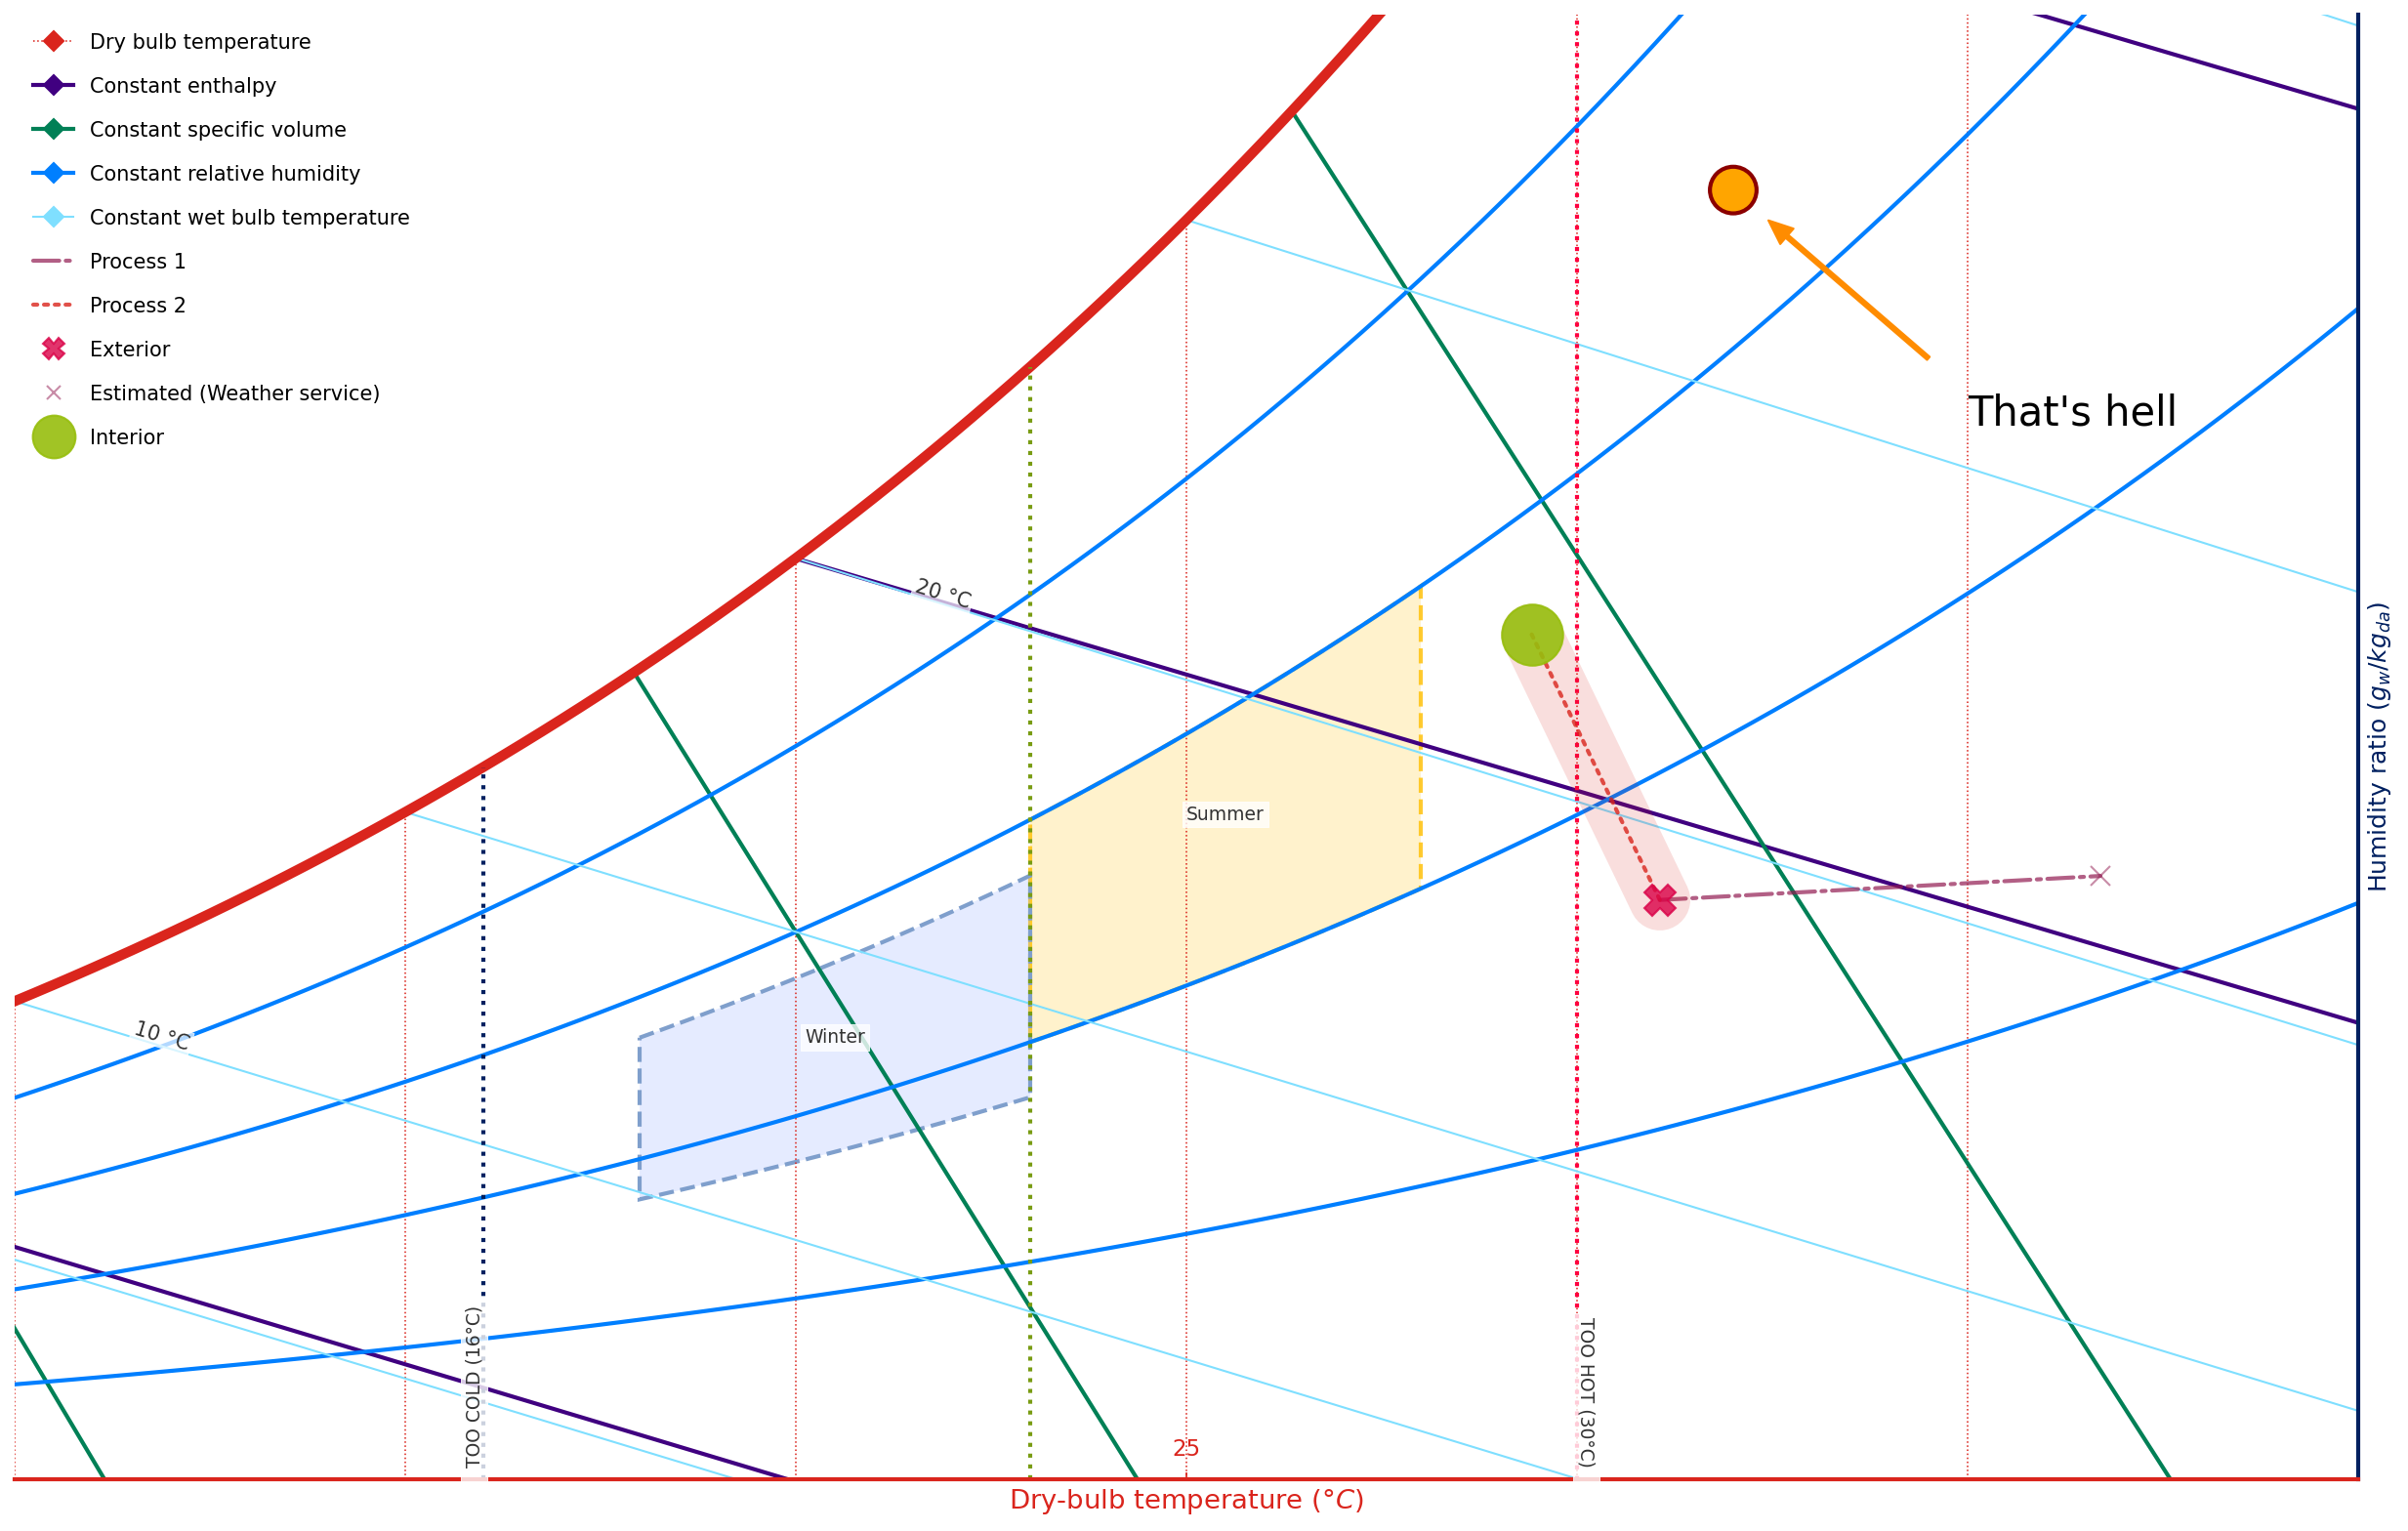

In [8]:
# use like any other matplotlib object to overlay info in chart coordinates
ax.text(
    32, 22, " ", ha="center", va="center", size=15, 
    bbox=dict(boxstyle="circle,pad=0.3", fc="orange", ec="darkred", lw=2)
)
ax.annotate(
    "That's hell", xy=(32, 22), xytext=(35, 18),
    fontsize=20,
    arrowprops=dict(color='darkorange', headwidth=10, width=2, shrink=0.15)
)

ax.get_figure()

## Customizing the bbox around annotations and using negative constant_h_labels_loc

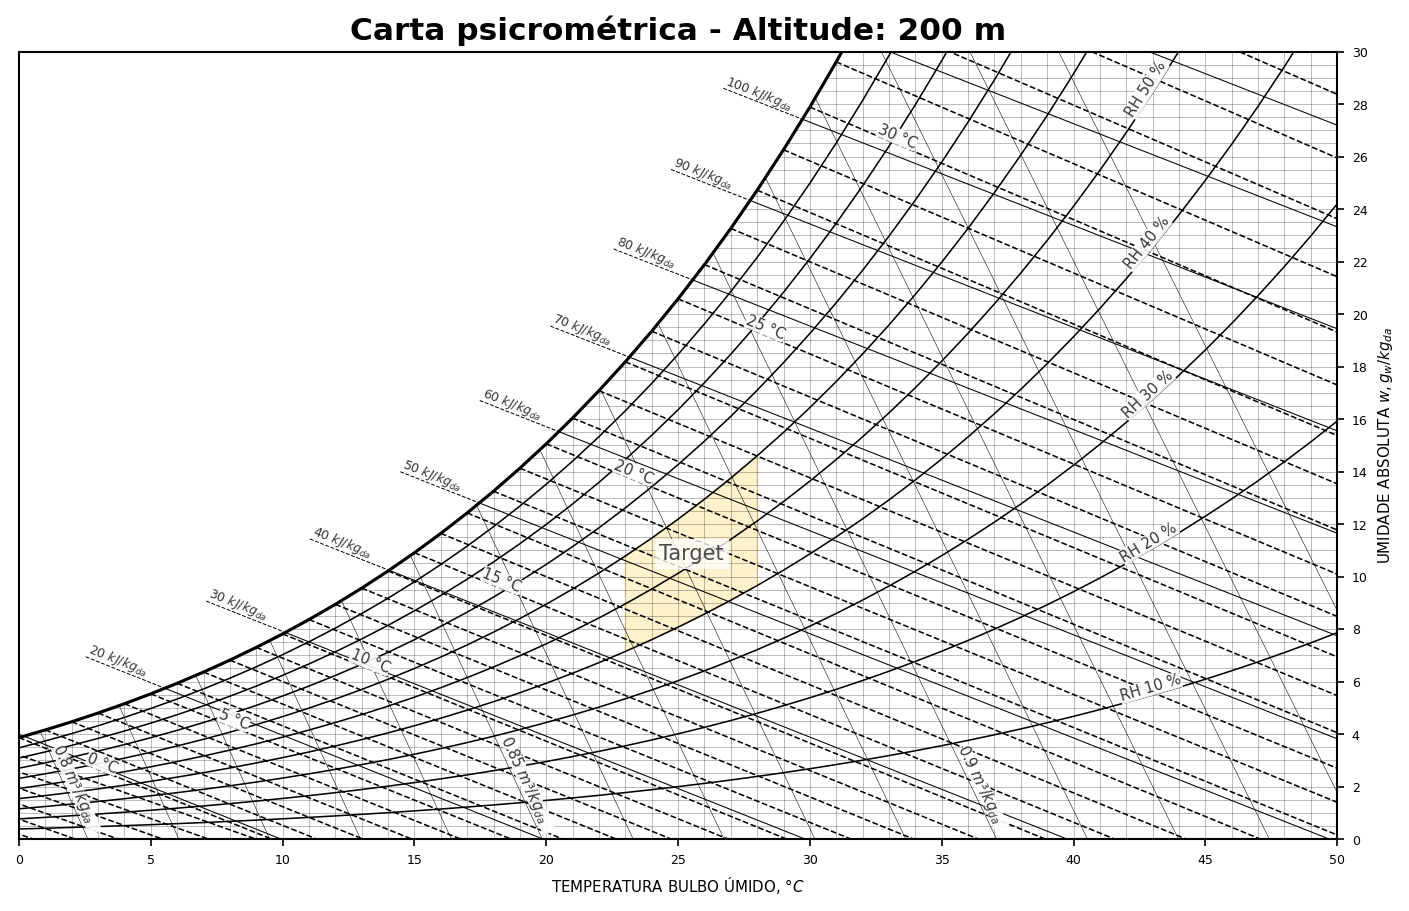

In [10]:
from psychrochart import load_config, PsychroChart
import matplotlib.pyplot as plt

altitude = 200
title = "Carta psicrométrica (Nível do mar)" if altitude == 0 else f"Carta psicrométrica - Altitude: {altitude} m"
custom_style = {
  "figure": {
    "figsize": [9.5, 6],
    "title": title,
    "x_label": "TEMPERATURA BULBO ÚMIDO, $°C$",
    "y_label": "UMIDADE ABSOLUTA $w, g_w / kg_{da}$",
    "x_axis": {
      "color": [0, 0, 0],
      "linewidth": 1,
      "linestyle": "-"
    },
    "x_axis_labels": {
      "color": [0, 0, 0],
      "fontsize": 6
    },
    "x_axis_ticks": {
      "direction": "out",
      "color": [0, 0, 0]
    },
    "y_axis": {
      "color": [0, 0, 0],
      "linewidth": 1,
      "linestyle": "-"
    },
    "y_axis_labels": {
      "color": [0, 0, 0],
      "fontsize": 6
    },
    "y_axis_ticks": {
      "direction": "out",
      "color": [0, 0, 0]
    },
    "partial_axis": False,
    "position": [0.025, 0.075, 0.925, 0.875]
  },
  "limits": {
    "range_temp_c": [0, 50],
    "range_humidity_g_kg": [0, 30],
    "altitude_m": altitude,
    "step_temp": 1
  },
  "saturation": {
    "color": [0, 0, 0],
    "linewidth": 1.5,
    "linestyle": "-"
  },
  "constant_rh": {
    "color": [0, 0, 0],
    "linewidth": 0.75,
    "linestyle": "-"
  },
  "constant_v": {
    "color": [0, 0, 0],
    "linewidth": 0.25,
    "linestyle": "-"
  },
  "constant_h": {
    "color": [0, 0, 0],
    "linewidth": 0.5,
    "linestyle": "-"
  },
  "constant_wet_temp": {
    "color": [0, 0, 0],
    "linewidth": 0.75,
    "linestyle": "--"
  },
  "constant_dry_temp": {
    "color": [0, 0, 0, 0.5],
    "linewidth": 0.25,
    "linestyle": "-"
  },
  "constant_humidity": {
    "color": [0, 0, 0, 0.5],
    "linewidth": 0.25,
    "linestyle": "-"
  },
    
  "chart_params": {
    "with_constant_rh": True,
    "constant_rh_curves": [10, 20, 30, 40, 50, 60, 70, 80, 90],
    "constant_rh_labels": [10, 20, 30, 40, 50],
      
    "with_constant_v": True,
    "constant_v_step": 0.01,
    "range_vol_m3_kg": [0.78, 0.96],
    "constant_v_labels": [0.8,0.85,0.9],
      
    "with_constant_h": True,
    "constant_h_step": 10,
    "constant_h_labels": [20, 30, 40, 50, 60, 70, 80, 90, 100],
    "range_h": [10, 130],
    "constant_h_labels_loc": -0.06,
      
    "with_constant_wet_temp": True,
    "constant_wet_temp_step": 1,
    "range_wet_temp": [-10, 35],
    "constant_wet_temp_labels": [0, 5, 10, 15, 20, 25, 30],
      
    "with_constant_dry_temp": True,
    "constant_temp_step": 1,
      
    "with_constant_humidity": True,
    "constant_humid_step": 0.5,
      
    "with_zones": False
    
      
  },
    
    
    
    "constant_v_annotation": {
        "color":[0.2, 0.2, 0.2], 
        "fontsize":7,
        "bbox": dict(boxstyle="square,pad=-0.2", color=[1, 1, 1, 0.9], lw=0.5)
    },
    "constant_h_annotation": {
        "color":[0.2, 0.2, 0.2], 
        "fontsize":6,
        "bbox": dict(boxstyle="square,pad=-0.1", color=[1, 1, 1, 0.9], lw=0.5)
    },
    "constant_wet_temp_annotation": {
        "color":[0.2, 0.2, 0.2], 
        "fontsize":7,
        "bbox": dict(boxstyle="square,pad=0", color=[1, 1, 1, 0.9], lw=0.5)
    },
    "constant_rh_annotation": {
        "color":[0.2, 0.2, 0.2], 
        "fontsize":7,
        "bbox": dict(boxstyle="square,pad=0", color=[1, 1, 1, 0.9], lw=0.5)
    },

}


# Get a preconfigured chart

chart = PsychroChart.create(custom_style)
plt.rcParams['font.size'] = '8'
# Append zones:

target_zone = {
    "zones":[{
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [1.0, 0.749, 0.0, 0.2],
                      "facecolor": [1.0, 0.749, 0.0, 0.2],
                      "fill": True,
                      "linewidth": 1,
                      "linestyle": "--",
                     },
            "points_x": [23, 28],
            "points_y": [40, 60],
            "label": "Target",
            "annotation_style": {"color":[0.3, 0.3, 0.3], 
                                "fontsize":10}
        }]
}


chart.append_zones(target_zone)

# Plot the chart

ax = chart.plot()
# chart.plot_points_dbt_rh(points, connectors)

# Add a legend
# chart.plot_legend(markerscale=.1, frameon=False, fontsize=6, labelspacing=1)
# show as matplotlib figure
# ax.text(23, 10, 'Chart', fontsize=20)
%matplotlib inline
ax.get_figure()